## Feature Analysis

Load Data

In [31]:
import numpy as np
import pandas as pd

X = pd.read_csv('./Datasets/train.csv', index_col='PassengerId')
X_test = pd.read_csv('./Datasets/test.csv', index_col='PassengerId')

y = X.Survived
X.dropna(axis=0, subset=['Survived'], inplace=True)
X.drop(['Survived'], axis=1, inplace=True)

Check if any null

In [32]:
X.isnull().any()

Pclass      False
Name        False
Sex         False
Age          True
SibSp       False
Parch       False
Ticket      False
Fare        False
Cabin        True
Embarked     True
dtype: bool

For cabin and embarked impute with a new feature value of Missing.
For Age impute with most frequent

In [33]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
X['Age'] = imputer.fit_transform(X[['Age']])
X['Cabin'] = X['Cabin'].fillna('Missing')
X['Embarked'] = X['Embarked'].fillna('Missing')

Encode Categorical Columns

In [34]:
# Encode categorical columns

from sklearn.preprocessing import LabelEncoder

categorical_cols = [cname for cname in X.columns if
                    X[cname].dtype == "object"]

numerical_cols = [cname for cname in X.columns if 
                X[cname].dtype in ['int64', 'float64']]

label_encoder = LabelEncoder()
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])

### Heat map for correlations within features

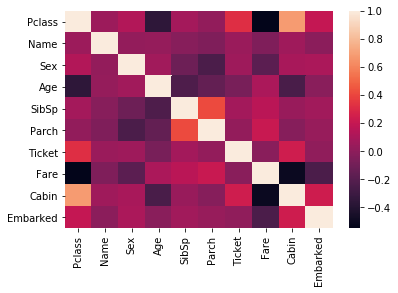

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(X.corr())

In [36]:
X.corr()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,1.000000,0.052831,0.131900,-0.356187,0.083081,0.018443,0.319869,-0.549500,0.682176,0.197493
Name,0.052831,1.000000,0.020314,0.026379,-0.017230,-0.049105,0.047348,-0.049173,0.062119,-0.006474
Sex,0.131900,0.020314,1.000000,0.073377,-0.114631,-0.245489,0.059372,-0.182333,0.095991,0.106395
Age,-0.356187,0.026379,0.073377,1.000000,-0.232411,-0.155118,-0.073202,0.107554,-0.250318,-0.014918
SibSp,0.083081,-0.017230,-0.114631,-0.232411,1.000000,0.414838,0.079461,0.159651,0.043525,0.068043
Parch,0.018443,-0.049105,-0.245489,-0.155118,0.414838,1.000000,0.020003,0.216225,-0.028179,0.032517
Ticket,0.319869,0.047348,0.059372,-0.073202,0.079461,0.020003,1.000000,-0.013885,0.243082,0.011871
Fare,-0.549500,-0.049173,-0.182333,0.107554,0.159651,0.216225,-0.013885,1.000000,-0.502569,-0.246359
Cabin,0.682176,0.062119,0.095991,-0.250318,0.043525,-0.028179,0.243082,-0.502569,1.000000,0.232192
Embarked,0.197493,-0.006474,0.106395,-0.014918,0.068043,0.032517,0.011871,-0.246359,0.232192,1.000000


### F Score analysis

In [37]:
from sklearn.feature_selection import f_classif

f_score, f_p_value = f_classif(X,y)
f_score_df = pd.DataFrame()
f_score_df['FScore'] = f_score
f_score_df['PValue'] = f_p_value
f_score_df.index = X.columns
f_score_df

,FScore,PValue
Pclass,115.031272,2.537047e-25
Name,2.932903,8.713998e-02
Sex,372.405724,1.406066e-69
Age,2.492141,1.147717e-01
SibSp,1.110572,2.922439e-01
Parch,5.963464,1.479925e-02
Ticket,24.740828,7.871168e-07
Fare,63.030764,6.120189e-15
Cabin,61.133712,1.505982e-14
Embarked,28.073426,1.473559e-07


### Mutual Information Analysis

In [38]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X, y)
mutual_info_df = pd.DataFrame(mutual_info)
mutual_info_df.columns = ['Mutual Info']
mutual_info_df.index = X.columns
mutual_info_df

,Mutual Info
Pclass,0.058781
Name,0.005883
Sex,0.128362
Age,0.015693
SibSp,0.023010
Parch,0.029139
Ticket,0.119142
Fare,0.133834
Cabin,0.041103
Embarked,0.011376


### Select K Best Features based on Chi Test

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

select_best = SelectKBest(chi2, k=2)
X_new = select_best.fit_transform(X, y)
chi_scores_df = pd.DataFrame(select_best.scores_)
chi_scores_df.columns = ['Chi Scores']
chi_scores_df.index = X.columns
chi_scores_df

,Chi Scores
Pclass,30.873699
Name,435.568915
Sex,92.702447
Age,15.174021
SibSp,2.581865
Parch,10.097499
Ticket,2871.655466
Fare,4518.319091
Cabin,560.803520
Embarked,15.844071


### Dimensionality Reduction with PCA and Visualization of variance

array([0.60162524, 0.36369618])

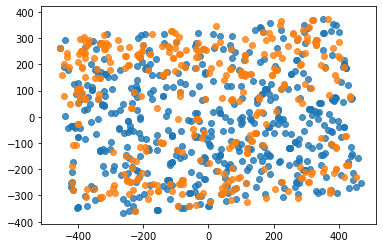

In [40]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure()
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], alpha=.8)
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], alpha=.8)

pca.explained_variance_ratio_